In [8]:
!pip install matplotlib_venn


In [10]:
%matplotlib inline
import matplotlib_venn

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns
from matplotlib_venn import venn3

In [3]:
!pip install -U matplotlib-venn


In [13]:
gencode = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/human.gencode.v37.annotation.bed', encoding = 'utf8')
allgenes = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/allgenes_muscle-skeletal-foxo3.csv', encoding = 'utf8', sep =";")
#allgenes.set_index("Gene ID",inplace = True)
allgenes['nlog10'] = -np.log10((allgenes['adj.P.Val']))
genes = pd.merge (gencode, allgenes)
genes.set_index("Gene Name", inplace = True)
genes = genes.drop(columns = ['Chrm', 'Start', 'End', 'Strand'])
genes ['valor'] = (np.sign(genes ['logFC']) - genes['nlog10'])
genes

,Gene ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,nlog10,valor
Gene Name,,,,,,,,,
WASH7P,ENSG00000227232.5,0.105572,2.998338,1.366637,0.173475,0.256017,-5.844816,0.591731,0.408269
WASH9P,ENSG00000279457.4,0.162014,2.677463,1.843352,0.066953,0.117602,-5.063097,0.929585,0.070415
AP006222.1,ENSG00000228463.10,-0.155380,-0.283375,-0.802865,0.423131,0.524115,-6.024329,0.280574,-1.280574
AP006222.2,ENSG00000286448.1,-0.146642,-1.117415,-0.680316,0.497195,0.594970,-5.988870,0.225505,-1.225505
AL669831.3,ENSG00000230021.10,-0.046849,8.961154,-0.237109,0.812847,0.861279,-6.968076,0.064856,-1.064856
...,...,...,...,...,...,...,...,...,...
AC009977.1,ENSG00000267793.1,-0.387065,-1.936281,-1.266199,0.207109,0.295729,-5.331471,0.529107,-1.529107
AC010889.1,ENSG00000260197.1,-0.555124,0.612139,-1.277145,0.203227,0.291373,-5.671145,0.535550,-1.535550
KDM5D,ENSG00000012817.16,-0.697035,2.265428,-1.456077,0.147146,0.224050,-5.639015,0.649656,-1.649656


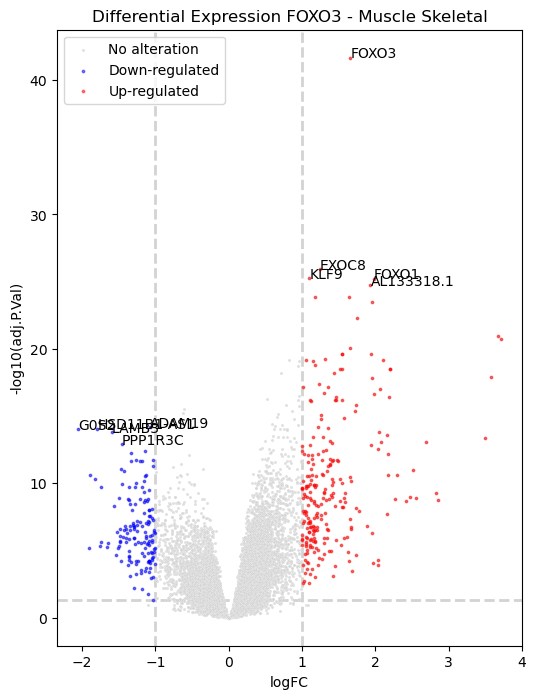

In [7]:
plt.figure(figsize = (6,8))

ax = sns.scatterplot(data = genes, x= 'logFC', y = 'nlog10', color = 'lightgray', s =5, alpha =0.7)
plt.title ('Differential Expression FOXO3 - Muscle Skeletal')
plt.ylabel ('-log10(adj.P.Val)')

down = genes[(genes['logFC']<=-1)&(genes['nlog10']>= -np.log10(0.05))]
up = genes[(genes['logFC']>=1)&(genes['nlog10']>= -np.log10(0.05))]

plt.scatter(x=down['logFC'],y=down['nlog10'],s=3,label="Down-regulated",color="blue", alpha = 0.5)
plt.scatter(x=up['logFC'],y=up['nlog10'],s=3,label="Up-regulated",color="red", alpha = 0.5)

down1 = genes[(genes['logFC']<=-1)&(genes['nlog10']>= 12.5)]
up1 = genes[(genes['logFC']>=1)&(genes['nlog10'] >= 24.5)]

for i,r in up1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)

for i,r in down1.iterrows():
    plt.text(x=r['logFC'],y=r['nlog10'],s=i)


ax.axhline (-np.log10(0.05), zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
ax.axvline (-1, zorder = 0, c = 'lightgray', lw = 2, ls = '--')
plt.legend(['No alteration','Down-regulated', 'Up-regulated'], loc = 'upper left')
plt.savefig('Differencial Expression_muscle-skeletal.png', format = 'png', dpi = 1200, bbox_inches ='tight')

In [7]:
#Criar tabela para a análise GSEA
enr = pd.merge (gencode, allgenes)
enr ['valor'] = (np.sign(enr ['logFC'])* -np.log10(enr['adj.P.Val']))
enr1 = pd.DataFrame ([enr['Gene Name'], enr ['valor']])
enr1 = enr1.T
enr1= enr1.sort_values(by='valor')
enr1.to_csv('Gene_Analysis_muscle-skeletal-foxo3.rnk', sep='\t', header= False, index= False)
enr1

,Gene Name,valor
9815,AL158151.3,-15.556835
9814,PTPA,-15.267089
6150,ADAM19,-14.189332
1806,HSD11B1-AS1,-14.072211
1807,G0S2,-14.010967
...,...,...
13233,AL133318.1,24.722343
13234,FOXO1,25.220983
9439,KLF9,25.279439
1969,EXOC8,25.907541


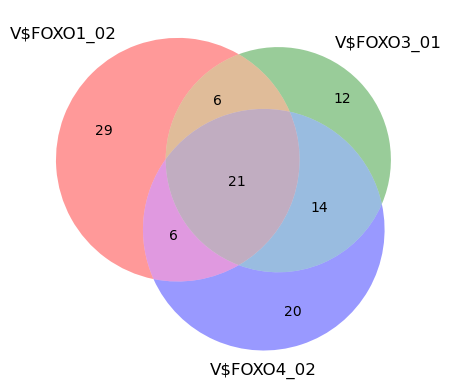

In [18]:
%matplotlib inline

#Diagrama de Venn
foxo1_02 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Expression/FOXO3/V$FOXO1_02.csv', sep = ', ',  engine='python')
foxo3_01 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Expression/FOXO3/V$FOXO3_01.csv', sep = ', ',  engine='python')
foxo4_02 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Expression/FOXO3/V$FOXO4_02.csv', sep = ', ',  engine='python')
foxo1_01 = pd.read_csv('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Resultados/Final/Expression/FOXO3/V$FOXO1_01.csv', sep = ', ',  engine='python')

set1 = set(foxo1_02['User ID'])
set2 = set(foxo3_01['User ID'])
set3 = set(foxo4_02['User ID'])
set4 = set(foxo1_01['User ID'])

venn3([set1, set2, set3], ('V$FOXO1_02', 'V$FOXO3_01','V$FOXO4_02'))

plt.show()

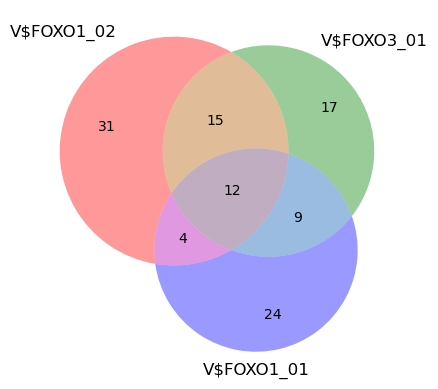

In [71]:
venn3([set1, set2, set4], ('V$FOXO1_02', 'V$FOXO3_01','V$FOXO1_01'))

plt.show()

In [21]:
matplotlib_venn([set1, set2, set3,set4], ('V$FOXO1_02', 'V$FOXO3_01','V$FOXO1_01'))

plt.show()

TypeError: 'module' object is not callable